# Lab 5: Optimización

__IMDB Example__

In [1]:
import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 

2024-10-11 10:40:25.403301: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-11 10:40:25.545181: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-11 10:40:25.698831: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 10:40:25.831243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 10:40:25.870401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-11 10:40:26.105300: I tensorflow/core/platform/cpu_feature_gu

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
import numpy as np
def multi_hot_encode(sequences, num_classes):
    # Creates an all-zero matrix of shape (len(sequences), num_classes)
    results = np.zeros((len(sequences), num_classes))
    
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

In [3]:
# Vectorized training data
x_train = multi_hot_encode(train_data, num_classes=10000)

# Vectorized test data
x_test = multi_hot_encode(test_data, num_classes=10000)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
import matplotlib.pyplot as plt

def plot(train, validation, title):
    plt.clf()
    epochs = range(1, len(train) + 1)
    
    plt.plot(epochs, train, 'b-o', label='Training ' + title)
    plt.plot(epochs, validation, 'r--o', label='Validation '+ title) 

    plt.title('Training and validation ' + title)
    plt.xlabel('Epochs')
    plt.ylabel(title)
    plt.legend()
    plt.show()

## 5.1. Gradient descent optimization
* Below is a table summarizing the most common gradient descent optimizers:

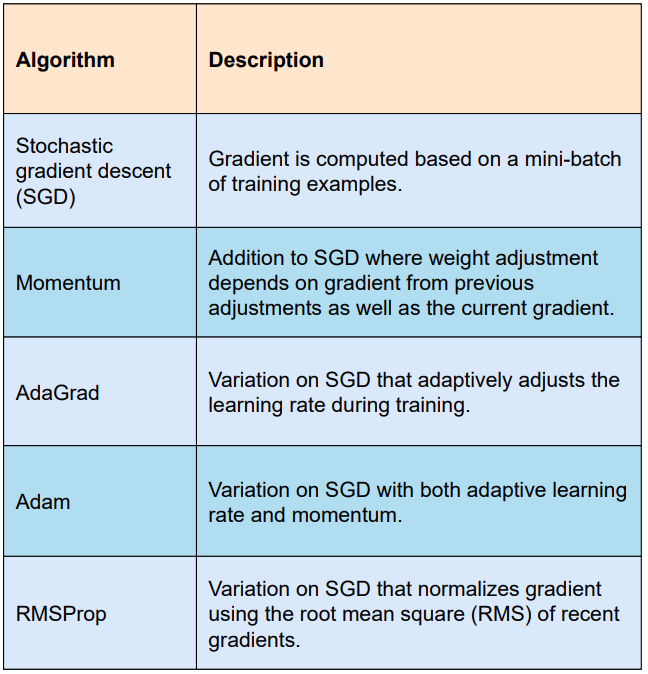

### 5.1.1. Performance comparison of different gradient descent optimizers

* SGD is slow and can get stuck in a saddle point.
* Momentum algorithms can exhibit oscillations until they build up velocity in the optimization direction.
* Algorithms that scale gradients/step sizes like adadelta and RMSProp proceed more like accelerated SGD and handle large gradients with more stability.

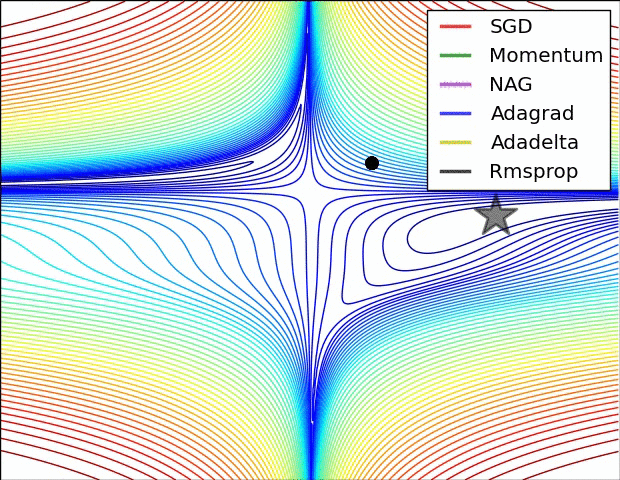

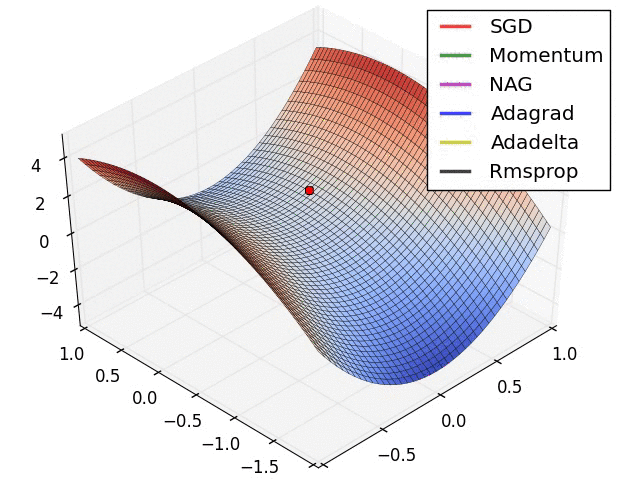

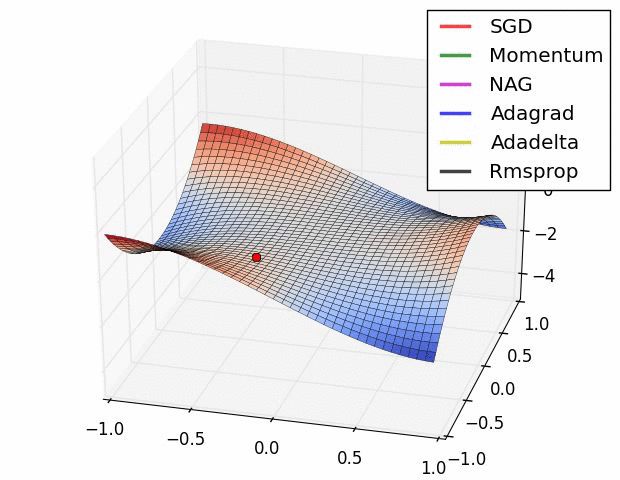

Credit: https://imgur.com/a/Hqolp

### 5.1.2. Keras optimizers

* Documentation: https://keras.io/api/optimizers/
* __Some available optimizers__:
    - SGD: https://keras.io/api/optimizers/sgd/
    - AdaGrad: https://keras.io/api/optimizers/adagrad/
    - RMSProp: https://keras.io/api/optimizers/rmsprop/
    - Adam: https://keras.io/api/optimizers/adam/


In [6]:
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Input(shape=(10,)))
model.add(layers.Dense(64, ))
model.add(layers.Activation('softmax'))

* We can pass optimizers by name (a string) to the compile method.
* In that case default parameters will be used.

In [7]:
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='adam')

* Or we can instantiate an optimizer object with the corresponding parameters.

In [8]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

* __Common parameters__:
    - `learning_rate`: A float, a `keras.optimizers.schedules.LearningRateSchedule` instance, or a callable that takes no arguments and returns the actual value to use. Normally defaults to `0.001` (in SGD is `0.01`).
    - `momentum`: A float. Values higher that `0` accelerate gradient descent in the relevant direction and dampens oscillations. Defaults to `0.0`.

<!--
    - `weight_decay`: Float value. Defaults to `None`. If set, weight decay is applied.
Weight_decay directly influences optimization in optimizers like Adam, while kernel_regularizer adjusts loss function in network layers, penalizing high weights to combat overfitting. Weight_decay affects optimization directly; layer regularization modifies model architecture.
-->

### 5.1.3. Learning rates schedules

* We can use a learning rate schedule to modulate how the learning rate of our optimizer changes over time.
* https://keras.io/api/optimizers/learning_rate_schedules/
* `ExponentialDecay`:
    - A `LearningRateSchedule` that uses an exponential decay schedule.
    - https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/
* `CosineDecay`: A `LearningRateSchedule` that uses a cosine decay with optional warmup.
    - https://keras.io/api/optimizers/learning_rate_schedules/cosine_decay/

In [9]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

### 5.1.4. IMDB Example

In [10]:
# === Build the model ===
model = keras.Sequential(name='imdb')
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, name='hidden_1', activation='relu'))
model.add(layers.Dense(16, name='hidden_2',activation='relu'))
model.add(layers.Dense(1, name='output',  activation='sigmoid'))

model.summary()

# Compile the model
model.compile(optimizer = 'SGD',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# Train the model
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_split = 0.4) # The early_stopping callback is passed to the fit method

history_dict = history.history

Model: "imdb"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5165 - loss: 0.6925 - val_accuracy: 0.5248 - val_loss: 0.6921
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5441 - loss: 0.6911 - val_accuracy: 0.5447 - val_loss: 0.6908
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5576 - loss: 0.6897 - val_accuracy: 0.5604 - val_loss: 0.6883
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5923 - loss: 0.6866 - val_accuracy: 0.5904 - val_loss: 0.6841
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6210 - loss: 0.6814 - val_accuracy: 0.6273 - val_loss: 0.6779
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6553 - loss: 0.6738 - val_accuracy: 0.6638 - val_loss: 0.6691
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6856 - loss: 0.6651 - val_accuracy: 0.6952 - val_loss: 0.6591
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7262 - loss: 0.6521 - val_accuracy: 0.7214 - val_loss

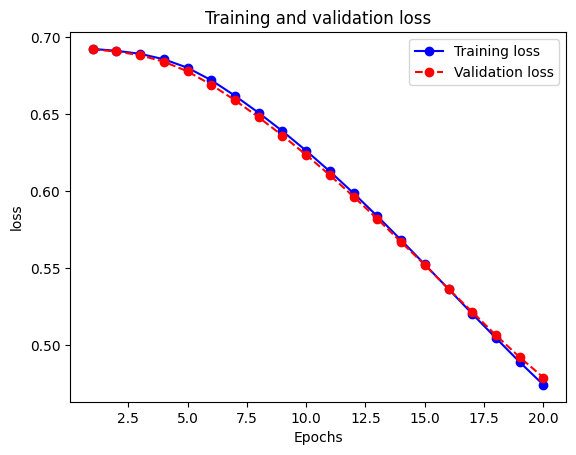

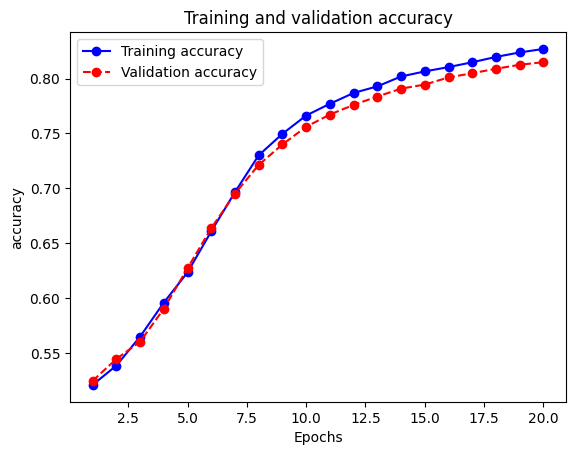

In [11]:
plot(history_dict['loss'], history_dict['val_loss'], 'loss')
plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')

In [12]:
# Compile the model
model.compile(optimizer = 'Adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# Train the model
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_split = 0.4) 

history_dict = history.history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8453 - loss: 0.4206 - val_accuracy: 0.8745 - val_loss: 0.3255
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9174 - loss: 0.2508 - val_accuracy: 0.8867 - val_loss: 0.2829
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9431 - loss: 0.1793 - val_accuracy: 0.8876 - val_loss: 0.2785
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9604 - loss: 0.1355 - val_accuracy: 0.8877 - val_loss: 0.2872
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9746 - loss: 0.1016 - val_accuracy: 0.8849 - val_loss: 0.3065
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9829 - loss: 0.0787 - val_accuracy: 0.8801 - val_loss: 0.3368
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9860 - loss: 0.0652 - val_accuracy: 0.8805 - val_loss: 0.3576
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9922 - loss: 0.0467 - val_accuracy: 0.8771 - val_loss

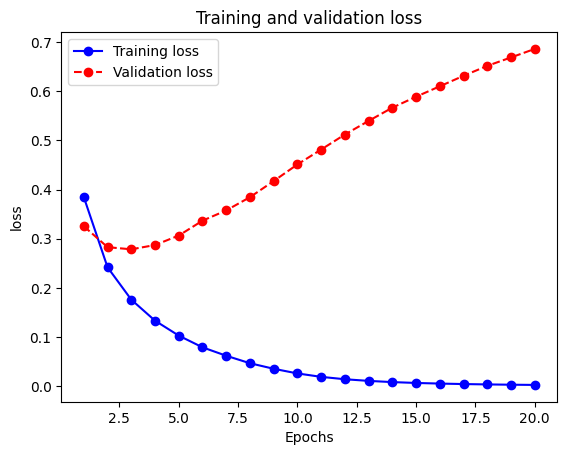

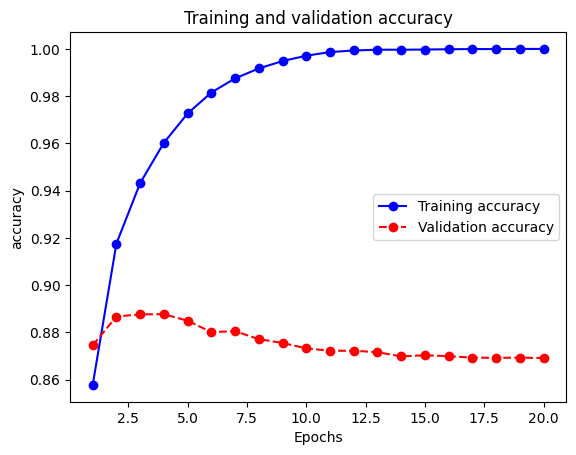

In [13]:
plot(history_dict['loss'], history_dict['val_loss'], 'loss')
plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')

## 5.2. Weight initialization 

### 5.2.1. Weight initialization problems

* In order to be able to train the network, it has to offer, from the very beginning, results for a given input.
* But this requires that the weights have a certain initial value.
* Let's look at several strategies:
    - __Zero weight initialization__ is not an option because the derivative with respect to the error function will be always the same for each weight, so all weights will have the same values in the next and subsequent iterations. In general any initialization of the weights to a constant value will have lousy performance.
    - __Random weight initialization__ is a better idea, non-zero weights will break the symmetry and the results for each neuron will be different, allowing the network to learn. But we must be careful because the randomness of the process can lead to various problems known as _vanishing gradients_ or _exploding gradients_.
* __Vanishing gradients__ are a problem that occurs when the variations in the weights after each iteration are very small, causing the optimization of the loss function to be very slow or, in the worst case, to stop the learning of the neural network altogether.
* __Exploding gradients__ is the opposite case. Very large changes in the values of the weights cause large changes in the error function. The gradients are then very large, causing it to oscillate around the value without falling into it and the model is unable to learn.
* At https://www.deeplearning.ai/ai-notes/initialization/ we have a great simulator that allows us to see this.

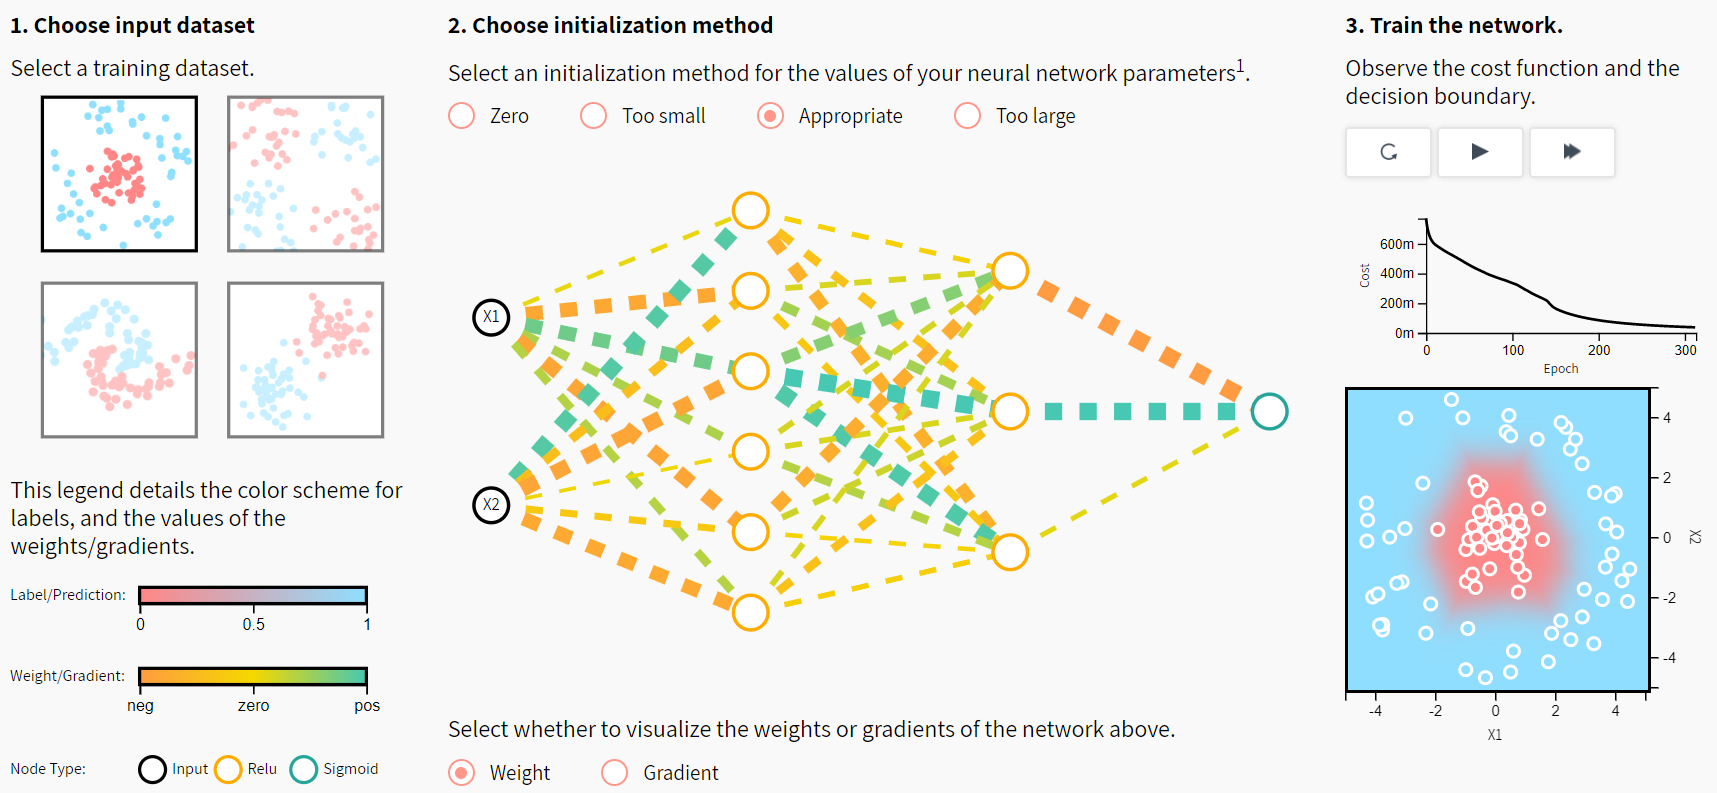

### 5.2.2. How to find appropriate initialization values

* To prevent the gradients of the network’s activations from vanishing or exploding, we will stick to the following rules of thumb:
    - The mean of the activations should be zero.
    - The variance of the activations should stay the same across every layer.
* The bias values can be initialized to zero.

* Varying the standard deviation calculation we obtain several initialization algorithms.
* Consider that
    - `fan_in` refers to the number of incoming connections (neurons of the previous layer).
    - `fan_out` refers to the number of outgoing connections (neurons of the next layer).
* __Types of weight initialization__    
    - _He initialization_
        - Proposed by Kaiming He, Researcher at Microsoft: https://arxiv.org/pdf/1502.01852.pdf
        - The standard deviation is calculated as `stddev = sqrt(2 / fan_in)`
    - _Xavier initialization_
        - Named after Xavier Glorot, researcher at the University of Montreal with Yoshua Bengio. (ref. http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf).
        - The standard deviation is calculated as `stddev = sqrt(1 / fan_in)`
    - _Glorot initialization_
        - Also proposed by Xavier Glorot
        - The standard deviation is calculated as `stddev = sqrt(2 / (fan_in + fan_out))`
    - _Uniform Glorot initialization_
        - In this case the weights are drawn from a uniform distribution (all values are equally likely) in the interval `[-limit, limit]` where `limit` is `sqrt(6 / (fan_in + fan_out))`.


### 5.2.3. Keras initializers

* The different Keras initializers can be consulted at: https://keras.io/initializers/
* The keyword arguments used for passing initializers to layers depends on the layer, but they usually are represented by the following parameters at the Layer constructor: `kernel_initializer` and `bias_initializer`.
* Some available initializers:
    - `RandomNormal`. 
    - `RandomUniform`
    - `Zeros`
    - `Ones`
    - `HeNormal`
    - `GlorotNormal`
    - `GlorotUniform`
    - etc.

In [14]:
# Usage in a Keras layer:
initializer = keras.initializers.GlorotNormal ()
layer = keras.layers.Dense(3, kernel_initializer=initializer)

### 5.2.4. IMDB Example

In [15]:
# === Build the model ===
model = keras.Sequential(name='imdb')
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, name='hidden_1', activation='relu', kernel_initializer=initializer))
model.add(layers.Dense(16, name='hidden_2',activation='relu', kernel_initializer=initializer))
model.add(layers.Dense(1, name='output',  activation='sigmoid', kernel_initializer=initializer))

model.summary()

# Compile the model
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# Train the model
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_split = 0.4) 

history_dict = history.history

Model: "imdb"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6646 - loss: 0.6350 - val_accuracy: 0.8566 - val_loss: 0.4174
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8920 - loss: 0.3419 - val_accuracy: 0.8873 - val_loss: 0.3000
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9317 - loss: 0.2199 - val_accuracy: 0.8850 - val_loss: 0.2853
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9484 - loss: 0.1683 - val_accuracy: 0.8883 - val_loss: 0.2808
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9647 - loss: 0.1234 - val_accuracy: 0.8886 - val_loss: 0.2896
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9756 - loss: 0.0945 - val_accuracy: 0.8843 - val_loss: 0.3096
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9824 - loss: 0.0766 - val_accuracy: 0.8826 - val_loss: 0.3340
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9899 - loss: 0.0568 - val_accuracy: 0.8779 - val_loss

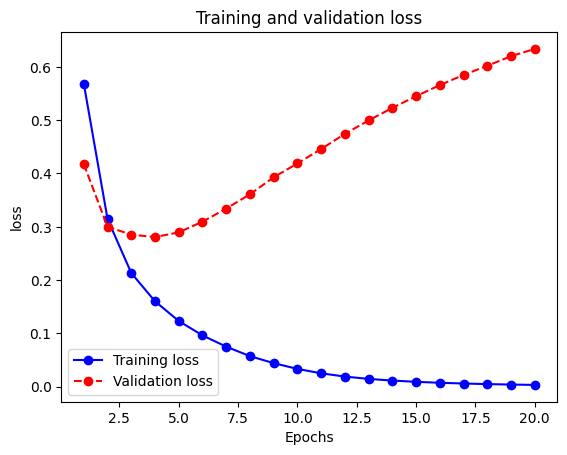

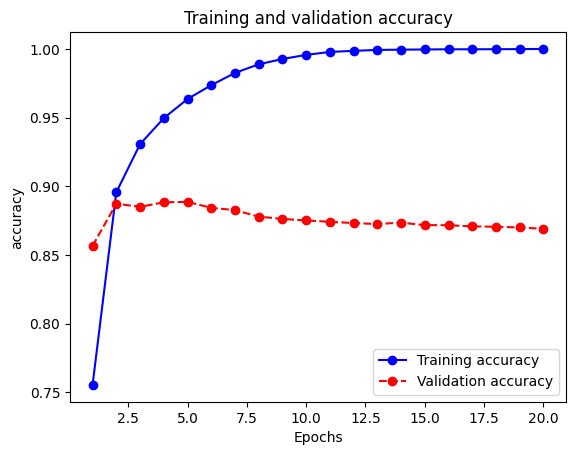

In [16]:
plot(history_dict['loss'], history_dict['val_loss'], 'loss')
plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')

## 5.3. Batch normalization

* Normalizing the input features can speed up learning.
* Batch normalization does the same for the hidden layers.
    - It normalizes the input to each layer of the network.
    - It is called _batch_ because it standardizes the layer inputs after each minibatch.
* Using batch normalization makes the network more stable during training. This may require the use of much larger than normal learning rates, that in turn may further speed up the learning process.
* 
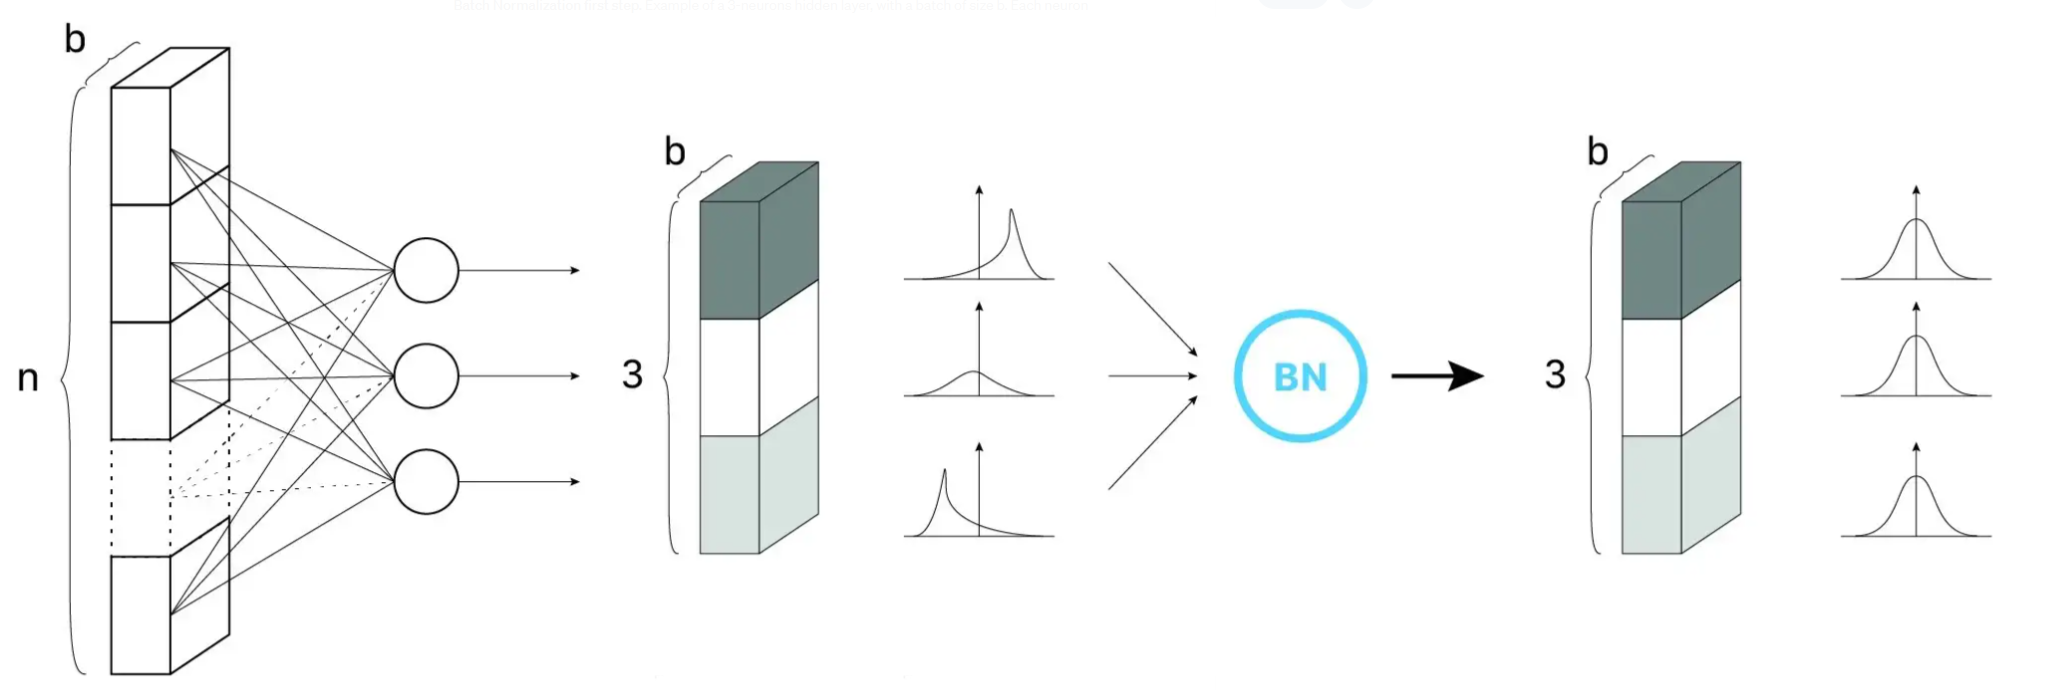

* __Batch normalization and dropout__:
    - Batch normalization offers some regularization effect, reducing generalization error, reducing the need to use of dropout for regularization.
    - Also it is advisable not to use dropout with batch normalization because the statistics used to normalize the activations of the prior layer may become noisy given the random dropping out of nodes during the dropout procedure.


### 5.3.1. Batch normalization parameters
* __Two new learnable  parameters__:
  - Unlike the input layer, which requires all normalized values to have zero mean and unit variance, Batch Normalization allows its values to be shifted (to a different mean) and scaled (to a different variance).
  - It does this by multiplying the normalized values by a factor, __gamma__ (for scaling), and adding to it a factor, __beta__ (for shifting).

* __Two  non-learnable parameters__:
  - __Mean Moving Average__.
  - __Variance Moving Average__.
  - They are saved as part of the ‘state’ of the Batch Normalizaton layer.
 
<!-- 
https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739 
https://www.youtube.com/watch?v=Jj_w_zOEu4M
-->

### 5.3.2. Batch normalization in Keras

* Batch normalization is also a layer that can be used after a layer or between a layer and its activation function:
* See: https://keras.io/api/layers/normalization_layers/batch_normalization/
* Some arguments of the constructor:
    - `center`: If `True`, add offset of `beta` to normalized tensor. If `False`, `beta` is ignored. Default is `True`.
    - `beta_initializer`: Initializer for the beta weight. Default is `"zeros"`.
    - `scale`: If `True`, multiply by `gamma`. If `False`, `gamma` is not used. Default is `True`.
    - `gamma_initializer`: Initializer for the `gamma` weight. Default is `"ones"`.

### 5.3.3. IMDB Example

In [17]:
# === Build the model ===
model = keras.Sequential(name='imdb')
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

# Compile the model
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# Train the model
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_split = 0.4) 

history_dict = history.history

Model: "imdb"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,433 (626.69 KB)

 Trainable params: 160,369 (626.44 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6679 - loss: 0.6150 - val_accuracy: 0.7802 - val_loss: 0.5989
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9195 - loss: 0.2609 - val_accuracy: 0.8281 - val_loss: 0.5179
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9598 - loss: 0.1579 - val_accuracy: 0.8768 - val_loss: 0.4445
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9823 - loss: 0.0975 - val_accuracy: 0.8789 - val_loss: 0.3993
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9942 - loss: 0.0570 - val_accuracy: 0.8751 - val_loss: 0.3718
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9986 - loss: 0.0349 - val_accuracy: 0.8729 - val_loss: 0.3416
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9995 - loss: 0.0219 - val_accuracy: 0.8719 - val_loss: 0.3235
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.8709 - val_loss

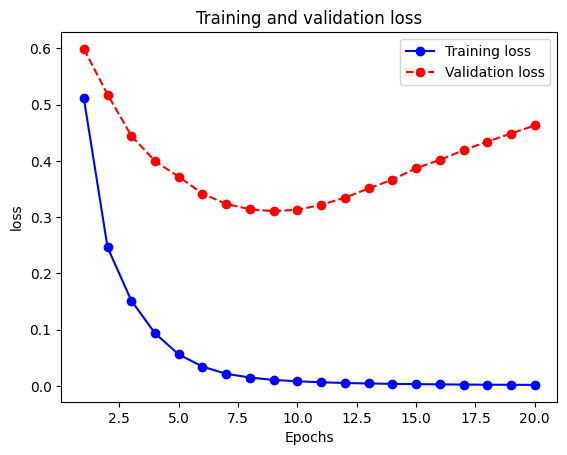

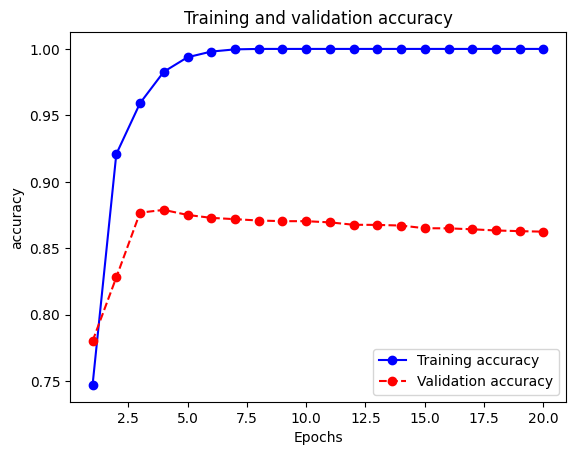

In [18]:
plot(history_dict['loss'], history_dict['val_loss'], 'loss')
plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')